<a href="https://colab.research.google.com/github/plaban1981/Handle-Imbalanced-Datasets-Techniques/blob/master/Restaurant_food_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


{'Data_Train.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x000\xb0a\xbe\x11\x04\t\x00j\xfa=\x00\x18\x00\x00\x00xl/worksheets/sheet1.xml\x8c\x9d[\x93%\xb7u\xa5\xdf\xe7W0\xf8>\xe6\xc1-\x91\xe9\x90\xe4p\x01Y\xd9\xf961\xb7wZjY\nK\xa4\x82\xa4\xed\x99\x7f?\x87*\xe0t\xaf\xb5\xb0\x81y\x93\x08\xec\xea\x02\n\t\xac}\x01\xbe\xdf\xfc\xd3\xff\xf9\xeb_\xbe\xf9\x8f\xcf?\xfd\xfc\xe7\x1f\x7f\xf8\xed\xb7\xee\x1f\x1e\xdf~\xf3\xf9\x87\xdf\xff\xf8\x87?\xff\xf0\xaf\xbf\xfd\xf6\x7f\xfd\xcf\xf7\xff\xba\x7f\xfb\xcd\xcf\xbf|\xff\xc3\x1f\xbe\xff\xcb\x8f?|\xfe\xed\xb7\xff\xf7\xf3\xcf\xdf\xfe\xd3\xef\xfe\xcbo\xfe\xf3\xc7\x9f\xfe\xed\xe7?}\xfe\xfc\xcb7\xcf\x1f\xf0\xc3\xcf\xbf\xfd\xf6O\xbf\xfc\xf2\xb7\x7f\xfc\xee\xbb\x9f\x7f\xff\xa7\xcf\x7f\xfd\xfe\xe7\x7f\xf8\xf1o\x9f\x7fx\xb6\xfc\xf1\xc7\x9f\xfe\xfa\xfd/\xcf\xff\xfb\xd3\xbf~\xf7\xf3\xdf~\xfa\xfc\xfd\x1f\xfen\xf4\xd7\xbf|\xe7\x1f\x8f\xed\xbb\xbf~\xff\xe7\x1f\xbe\xfd\xf8\t\xff\xf8\xd3\xff\xcf\xcf\xf8\xf1\x8f\x7f\xfc\xf3\xef?\xd7\x1f\x7f\xff\xef\x7f\xfd\xfc\xc

## Import ML libraries

In [0]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split 

labels = LabelEncoder()
minmax = MinMaxScaler()

## Load training data using pandas

In [0]:

df_train = pd.read_excel('Data_Train.xlsx')

In [88]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


## Schema of the dataset

In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.3+ KB


## Check for Features having null values 

In [90]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

CITY         112
LOCALITY      98
RATING         2
VOTES       1204
dtype: int64

## DataFrame Summarry Statistics

In [91]:
df_train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [92]:
df_train.describe(include = 'O')

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,12690,12690,12690,12578,12592,12688,11486
unique,113,4155,2689,359,1416,32,1847
top,QUICK BITES,South Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9,44 votes
freq,4218,532,1415,2174,166,1238,71


## Checking for data having CITY as null

In [93]:
df_train[df_train['CITY'].isnull()].head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
129,None,9101,"North Indian, South Indian, Chinese, Continental","12noon – 3pm, 7pm – 2am (Mon-Sun)",NaN,NaN,3.6,728 votes,500
246,QUICK BITES,14502,Biryani,12noon – 11pm (Mon-Sun),NaN,Palarivattom Kochi,3.4,82 votes,300
411,None,6313,"North Indian, Chinese, Pizza, Burger, Fast Food",7pm – 4am (Mon-Sun),NaN,NaN,4.0,29 votes,600
466,None,1133,North Indian,4pm – 9pm (Mon-Sun),NaN,NaN,4.2,55 votes,200
481,None,4788,Street Food,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",NaN,NaN,3.7,616 votes,250


In [94]:
df_train['TIME'].nunique(),df_train['CUISINES'].nunique()

(2689, 4155)

In [95]:
df_train.shape

(12690, 9)

In [96]:
df_train[df_train['RESTAURANT_ID'] == 6313]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
411,None,6313,"North Indian, Chinese, Pizza, Burger, Fast Food",7pm – 4am (Mon-Sun),NaN,NaN,4.0,29 votes,600


## Fill missing values for RATING

In [97]:
 df_train['RATING'].describe()[2]

'3.9'

In [0]:
df_train['RATING'] = df_train['RATING'].fillna('0.0')

## Check for columns having missing values

In [99]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

CITY         112
LOCALITY      98
VOTES       1204
dtype: int64

## Convert RATING column to numeric

In [0]:
df_train['RATING'] = labels.fit_transform(df_train['RATING'])

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12690 non-null int64
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(3), object(6)
memory usage: 892.3+ KB


## Checking for data having Ratings as NULL

In [101]:
df_train[df_train['RATING'].isnull()].head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST


In [102]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,18,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,24,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,20,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,23,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,20,165 votes,300


In [103]:
df_train['RATING'].max(),df_train['RATING'].min()

(32, 0)

## Fill missing values for VOTES

In [0]:
df_train['VOTES'] = df_train['VOTES'].fillna('0 votes')

In [105]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

CITY        112
LOCALITY     98
dtype: int64

## Label Encoding

In [0]:
df_train['VOTES']  = labels.fit_transform(df_train['VOTES'] )

In [107]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,18,1279,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,24,951,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,20,713,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,23,788,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,20,471,300


In [108]:
df_train['VOTES'].min(),df_train['VOTES'].max()

(0, 1847)

## Remove Special Characters if any from CITY column

In [0]:
def clean_text(x):
  listx = x.lower().split(' ')
  Metro = ['mumbai','new delhi','delhi','chennai','kolkata']
  for items in Metro:
    
    if items in listx:
      return 'Metro'
      break
    else:
      return 'Non-Metro'



df_train['CITY'] = df_train['CITY'].apply(lambda x : clean_text(str(x)))


In [110]:
df_train['CITY'].unique()

array(['Non-Metro', 'Metro'], dtype=object)

In [111]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Non-Metro,Dombivali East,18,1279,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Non-Metro,Ramapuram,24,951,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Non-Metro,Saligramam,20,713,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Metro,Bandra West,23,788,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Metro,Lower Parel,20,471,300


In [0]:
df_train['CITY'] = labels.fit_transform(df_train['CITY'])

In [0]:
def encode_cuisines(x):
  
  food = x.split(",")[0]
  return food

In [0]:
df_train['FOOD_TYPE'] = df_train['TITLE'].apply(lambda x : encode_cuisines(x))

In [115]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,FOOD_TYPE
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",1,Dombivali East,18,1279,1200,CASUAL DINING
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),1,Ramapuram,24,951,1500,CASUAL DINING
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",1,Saligramam,20,713,800,CASUAL DINING
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),0,Bandra West,23,788,800,QUICK BITES
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),0,Lower Parel,20,471,300,DESSERT PARLOR


In [116]:
df_train['FOOD_TYPE'].unique()

array(['CASUAL DINING', 'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ',
       'MICROBREWERY', 'BAKERY', 'None', 'BAR', 'PUB', 'BEVERAGE SHOP',
       'FINE DINING', 'SWEET SHOP', 'FOOD COURT', 'LOUNGE', 'FOOD TRUCK',
       'MESS', 'KIOSK', 'CLUB', 'DHABA', 'MEAT SHOP', 'COCKTAIL BAR',
       'CONFECTIONERY', 'PAAN SHOP'], dtype=object)

In [0]:
df_train['FOOD_TYPE'] = labels.fit_transform(df_train['FOOD_TYPE'])

## Creating Features and Labels

In [0]:
X = df_train[['RESTAURANT_ID','FOOD_TYPE','CITY','RATING','VOTES']]
Y = df_train['COST']

## Check Corelation / Multicolinearity among the features using Heatmap

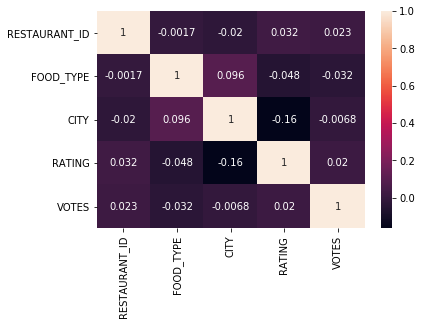

In [121]:
import seaborn as sns
sns.heatmap(X.corr(),annot=True)

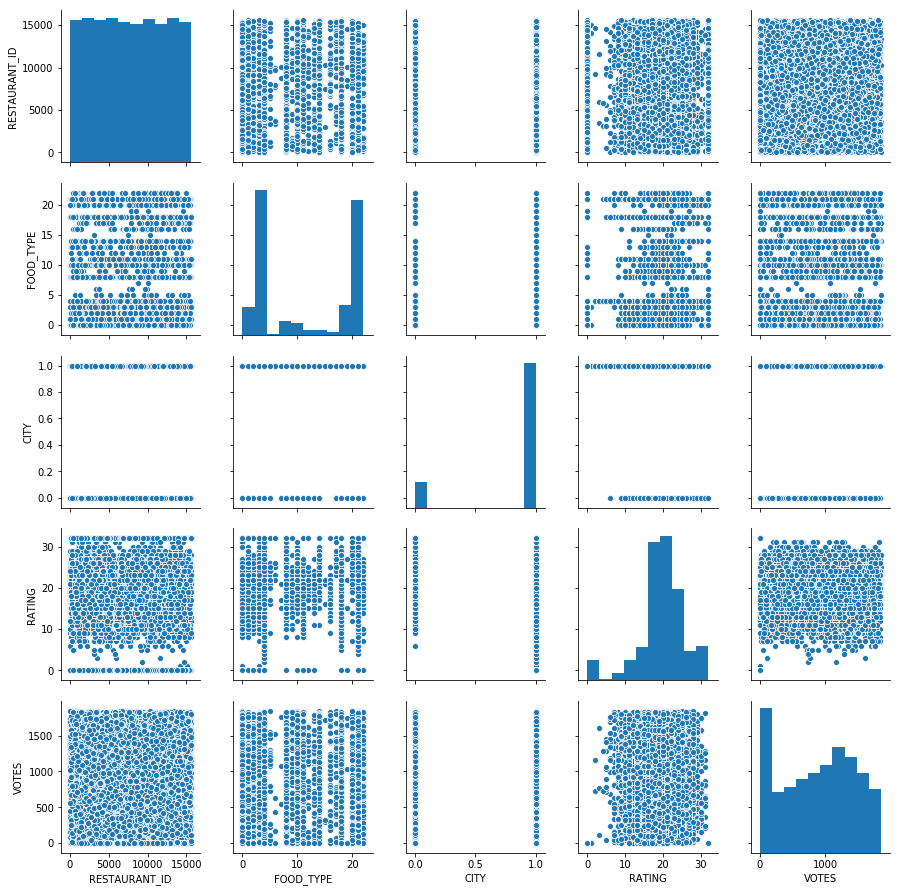

In [122]:
sns.pairplot(data=X)

In [0]:
Time_Slot = []
for i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null int64
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null int64
TIME             12690 non-null int64
CITY             12690 non-null int64
LOCALITY         12690 non-null int64
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(7), object(2)
memory usage: 892.3+ KB


In [0]:
X_scaled  = minmax.fit_transform(X)

In [0]:
y_scaled = Y.values

## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=1)


In [126]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(10152, 5) (10152,)
(2538, 5) (2538,)


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [128]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [129]:
sel.get_support()

array([False,  True, False, False, False])

In [130]:
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)

1

In [131]:
selected_feat

Index(['FOOD_TYPE'], dtype='object')

## Using RandomForestRegressor as the base estimator

In [0]:
rf = RandomForestRegressor(n_estimators=100)

## finding out feature importance usinf Recursive Feature Elimination Using Cross Validation

In [133]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(rf, step=1, cv=5)
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

## Feature Ranking

In [134]:
rfecv.ranking_

array([1, 1, 1, 1, 1])

In [0]:
df_feature_importance = pd.DataFrame({"Column": X.columns,"Rank":rfecv.ranking_})

In [136]:
df_feature_importance

,Column,Rank
0,RESTAURANT_ID,1
1,FOOD_TYPE,1
2,CITY,1
3,RATING,1
4,VOTES,1


In [137]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

In [142]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))

437.1099498916294


##  Finding R Squared Error value or Coefficient of Determination - regression score function.

In [143]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5807445497255816

In [0]:
df_pred = pd.DataFrame({"Original_COST":y_test,"Predicted_COST":y_pred})

In [145]:
df_pred.head()

,Original_COST,Predicted_COST
0,400,359.0
1,200,298.5
2,300,402.0
3,300,259.5
4,200,344.5


In [146]:
df_pred.tail()

,Original_COST,Predicted_COST
2533,1500,1192.0
2534,200,289.5
2535,300,502.5
2536,200,273.0
2537,400,882.0


In [0]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,50,100,150],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [148]:
best_score,best_param = Grid_Search_CV_RFR(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


## The best optimum parameters retrieved after performing Grid Search with Cross Validation

In [149]:
best_param

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 100}

## The best optimum regression for the optimum parameters retrieved after performing Grid Search with Cross Validation

In [150]:
best_score

0.6725578799602521

## Applying the best optimum parameters to RandomForestRegressor

In [0]:
rf = RandomForestRegressor().set_params(**best_param)

In [154]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

## Regression Score

In [156]:
r2_score(y_test,y_pred)

0.5905181801117293

In [0]:
df_pred = pd.DataFrame({"Original_COST":y_test,"Predicted_COST":y_pred})

In [158]:
df_pred.head()

,Original_COST,Predicted_COST
0,400,374.488480
1,200,314.123016
2,300,383.859325
3,300,267.315438
4,200,350.202019


In [159]:
print(np.sqrt(mean_squared_error(y_pred,y_test)))

431.9849794761716


## Applying Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [161]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

631.8512549073722


In [162]:
r2_score(y_test,y_pred)

0.12395374575907314

## the Regression Score  of LinearRegression is only 12 % as compared to 59% for RandomForestRegressor . Hence RandomForestRegressor performs better

## Applying XGBOOST Regressor

In [0]:
import xgboost as xgb

##   We have to convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains

In [0]:
data_dmatrix = xgb.DMatrix(data=X_scaled,label=y_scaled)

## XGBoost's hyperparameters

* learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

* max_depth: determines how deeply each tree is allowed to grow during any boosting round.

* subsample: percentage of samples used per tree. Low value can lead to underfitting.

* colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

* n_estimators: number of trees you want to build.

* objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

* gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

* alpha: L1 regularization on leaf weights. A large value leads to more regularization.

*  lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

## Instantiate an XGBoost regressor object by calling the XGBRegressor() class 

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [174]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
preds = xg_reg.predict(X_test)

In [178]:
print('Regression Score : {}%'.format(r2_score(y_test,y_pred) * 100))

Regression Score : 12.395374575907315%


In [177]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 631.851255


## k-fold Cross Validation using XGBoost
In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method.

## K-fold parameters description 

* num_boost_round: denotes the number of trees you build (analogous to n_estimators)

* metrics: tells the evaluation metrics to be watched during CV

* as_pandas: to return the results in a pandas DataFrame.

* early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.

* seed: for reproducibility of results.

In [0]:
#hyper parameter dictionary 
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [0]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [185]:
cv_results.head(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,853.466960,12.517351,853.274129,25.488582
1,812.731140,12.948336,813.150431,26.601833
2,778.238668,13.282580,778.850362,27.533307
3,748.861369,13.553658,749.827047,28.534879
4,724.253377,13.842029,725.407633,29.236768
5,693.483012,17.973794,694.595073,35.256128
6,663.508504,6.660972,665.604472,44.445185
7,637.841756,9.834445,641.042643,53.947910
8,624.427857,10.426190,628.595988,54.911067
9,594.279378,11.527012,598.900533,50.279125


In [186]:
print((cv_results["test-rmse-mean"]).tail(1))

49    422.15563
Name: test-rmse-mean, dtype: float64


## Feature Importance

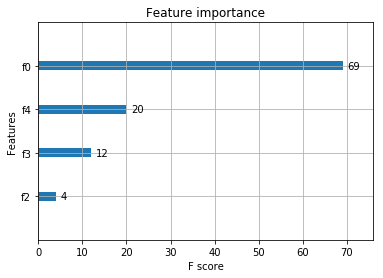

In [188]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [189]:
X.columns

Index(['RESTAURANT_ID', 'FOOD_TYPE', 'CITY', 'RATING', 'VOTES'], dtype='object')

In [0]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
classifier= XGBRegressor()

In [0]:
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7,10],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [0]:
xgb_grid = GridSearchCV(classifier,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [202]:
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:   34.9s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7, 10], 'min_child_weight'

In [203]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6874965093229081
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


## Applying Optimum parameters to XGBoostRegressor

In [0]:
classifier= XGBRegressor(colsample_bytree= 0.7, 
                         learning_rate= 0.03, 
                         max_depth = 5, 
                         min_child_weight = 4, 
                         n_estimators =  500, 
                         objective = 'reg:squarederror', 
                         silent= 1, 
                         subsample =0.7)

In [205]:
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=1, subsample=0.7, verbosity=1)

In [0]:
y_pred = classifier.predict(X_test)

In [207]:
print('Regression Score : ',r2_score(y_test,y_pred))

Regression Score :  0.5995561340192297


## Predicting Cost for training data

In [0]:
test = pd.read_excel('Data_Test.xlsx')

In [0]:
test.head(3)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes


In [0]:
df_test = test.copy()
df_test['CITY'] = df_test['CITY'].apply(lambda x : clean_text(str(x)))
df_test['CITY'] = labels.fit_transform(df_test['CITY'])

In [0]:
df_test['LOCALITY'] = df_test['LOCALITY'].apply(lambda x : clean_text(str(x)))
df_test['LOCALITY'] = labels.fit_transform(df_test['LOCALITY'])

In [0]:
df_test['VOTES'] = df_test['VOTES'].apply(lambda x : newtxt(x))

In [0]:
df_test['RATING'] = df_test['RATING'].apply(lambda x : newtxt(x))

In [0]:
for i in df_test.columns:
  if df_test[i].dtypes == 'object':
    df_test[i] = labels.fit_transform(df_test[i])

In [0]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,4085,1293,503,105,656,23,823
1,75,12680,1632,933,92,219,22,871
2,23,1411,1455,219,92,406,18,575
3,66,204,208,1071,39,450,18,179
4,75,13453,1637,208,75,296,16,394


In [0]:
test_scaled = minmax.fit_transform(df_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
test_pred = rf.predict(test_scaled)

In [0]:
test['COST'] = test_pred.astype('int')

In [0]:
test.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,1056
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,342
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,691
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,466
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,376
5,"FOOD TRUCK,DESSERT PARLOR",4518,"Ice Cream, Desserts","2pm – 12midnight (Mon),1pm – 12:30AM (Tue-Sun)",Hyderabad,Banjara Hills,3.7,36 votes,1909
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,NaN,852
7,CASUAL DINING,5109,"Biryani, Chinese","12noon – 3:30pm, 7pm – 10pm (Mon-Sun)",Chennai,Navalur,4.0,703 votes,759
8,None,5606,"North Indian, Chinese, Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,IP Extension,3.4,475 votes,314
9,CASUAL DINING,14319,North Indian,Not Available,Kochi,Palarivattom,3.2,6 votes,686
